# ML3: Deep Learning | Lab 1 | Danila Pechenev

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

In [2]:
def datagen(n, sigma=0.05):
    X = np.random.rand(n, 2)
    x1, x2 = X[:, 0], X[:, 1]
    a, b, c = 0.5, 1.0, -0.75
    D = (a * x1 + b * x2 + c) / np.sqrt(a**2 + b**2)
    y = (D > 0).astype(int)
    r = np.exp(-(D**2) / (2 * sigma**2))
    z = np.random.binomial(1, r / 2)
    y[z == 1] = 1 - y[z == 1]
    return X, y

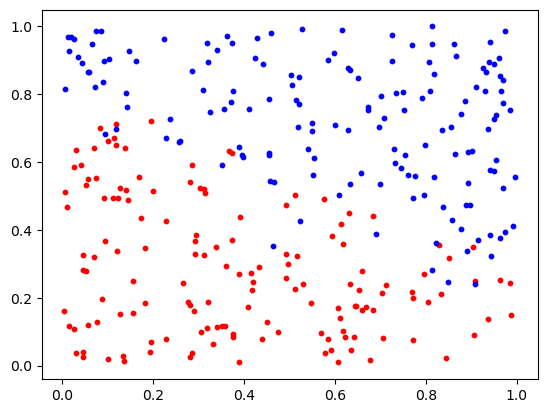

In [3]:
X, y = datagen(300)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', s=10)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', s=10)
plt.show()

In [4]:
X_plus = np.hstack((X, np.ones((X.shape[0], 1))))

In [5]:
def batch_logreg(X_plus, y, lr=0.1, eps=1e-4, max_epochs=2000, acc_target=None):
    def sigmoid(z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    thetas = []
    theta = np.zeros(X_plus.shape[1])
    thetas.append(theta.copy())
    
    loss_prev = np.inf
    epochs = 0

    while epochs < max_epochs:
        pred = sigmoid(X_plus @ theta)
        err = pred - y

        grad = (X_plus.T @ err) / len(y)
        theta = theta - lr * grad
        thetas.append(theta.copy())

        epochs += 1

        loss_curr = -np.mean(
            y * np.log(pred + 1e-12) +
            (1 - y) * np.log(1 - pred + 1e-12)
        )

        # stopping by loss stabilization
        if abs(loss_prev - loss_curr) < eps:
            break
        loss_prev = loss_curr

        # optional stopping by accuracy
        if acc_target is not None:
            y_pred = (pred >= 0.5).astype(int)
            acc = np.mean(y_pred == y)
            if acc >= acc_target:
                break

    return np.array(thetas), epochs

In [6]:
def plot_theta_trajectory(thetas, title="Theta trajectory"):
    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(projection="3d")

    ax.plot(
        thetas[:, 0],
        thetas[:, 1],
        thetas[:, 2],
        '-o',
        markersize=3
    )

    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_zlabel(r'$\theta_2$')
    ax.set_title(title)

    plt.tight_layout()
    plt.show()

In [7]:
thetas_002, epochs_002 = batch_logreg(X_plus, y, lr=0.02)
print(f'Training of batch logreg with lr=0.02 required {epochs_002} epochs')

Training of batch logreg with lr=0.02 required 1222 epochs


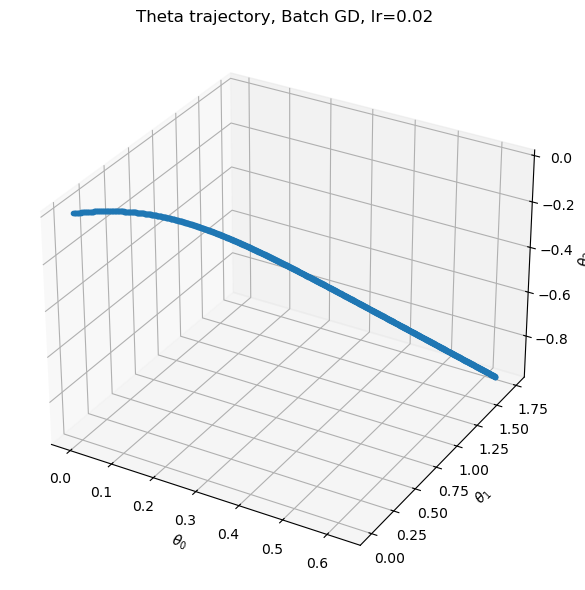

In [8]:
plot_theta_trajectory(thetas_002, title="Theta trajectory, Batch GD, lr=0.02")

In [9]:
thetas_01, epochs_01 = batch_logreg(X_plus, y, lr=0.1)
print(f'Training of batch logreg with lr=0.1 required {epochs_01} epochs')

Training of batch logreg with lr=0.1 required 1118 epochs


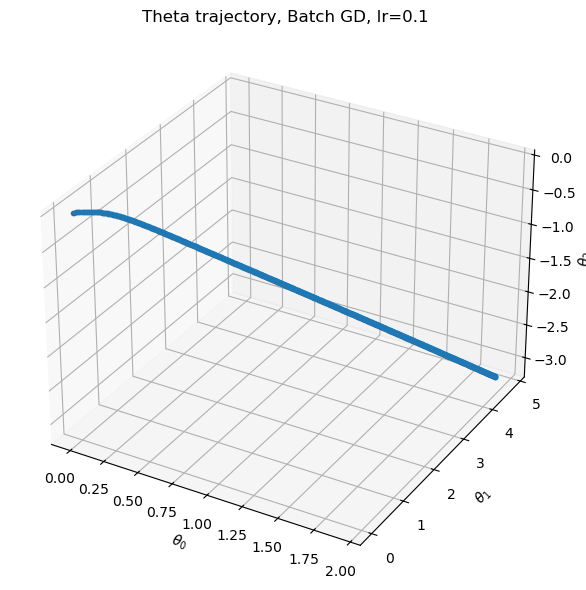

In [10]:
plot_theta_trajectory(thetas_01, title="Theta trajectory, Batch GD, lr=0.1")

In [11]:
def stochastic_logreg(X_plus, y, lr=0.1, eps=1e-4, max_epochs=2000, random_seed=42, acc_target=None):
    np.random.seed(random_seed)
    def sigmoid(z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    thetas = []
    theta = np.zeros(X_plus.shape[1])
    thetas.append(theta.copy())

    loss_prev = np.inf
    n = len(y)
    epochs = 0

    while epochs < max_epochs:
        perm = np.random.permutation(n)
        X_perm = X_plus[perm]
        y_perm = y[perm]

        # one epoch
        for i in range(n):
            pred = sigmoid(X_perm[i] @ theta)
            err = pred - y_perm[i]
            grad = X_perm[i] * err
            theta = theta - lr * grad
            thetas.append(theta.copy())

        epochs += 1

        # loss after epoch
        pred_all = sigmoid(X_plus @ theta)
        loss_curr = -np.mean(
            y * np.log(pred_all + 1e-12) +
            (1 - y) * np.log(1 - pred_all + 1e-12)
        )

        # stopping by loss stabilization
        if abs(loss_prev - loss_curr) < eps:
            break
        loss_prev = loss_curr

        # optional stopping by accuracy
        if acc_target is not None:
            acc = np.mean((pred_all >= 0.5) == y)
            if acc >= acc_target:
                break

    return np.array(thetas), epochs

In [12]:
thetas_sgd, epochs_sgd = stochastic_logreg(X_plus, y, lr=1.5)
print(f'Training of stochastic logreg with lr=1.5 required {epochs_sgd} epochs')

Training of stochastic logreg with lr=1.5 required 17 epochs


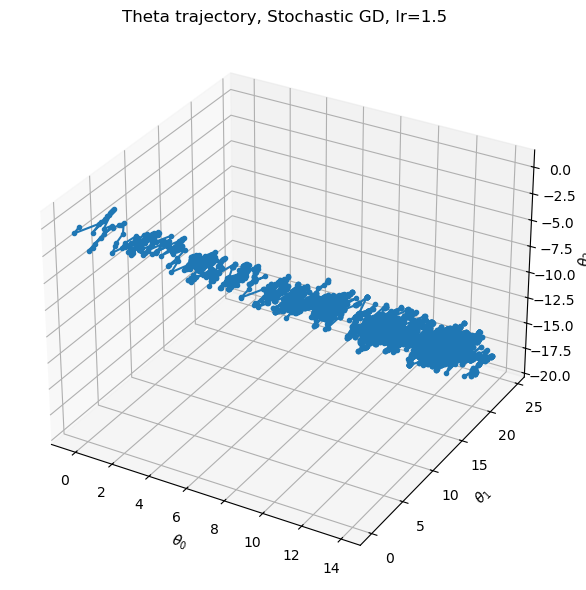

In [13]:
plot_theta_trajectory(thetas_sgd, title="Theta trajectory, Stochastic GD, lr=1.5")

In [14]:
# For fair comparison
thetas_15, epochs_15 = batch_logreg(X_plus, y, lr=1.5)
print(f'Training of batch logreg with lr=1.5 required {epochs_15} epochs')

Training of batch logreg with lr=1.5 required 432 epochs


In [15]:
def plot_separator(theta, ax, label=None, linestyle='-'):
    w1, w2, b = theta
    xs = np.array([0, 1])
    ys = -(w1 * xs + b) / w2
    ax.plot(xs, ys, linestyle, label=label)

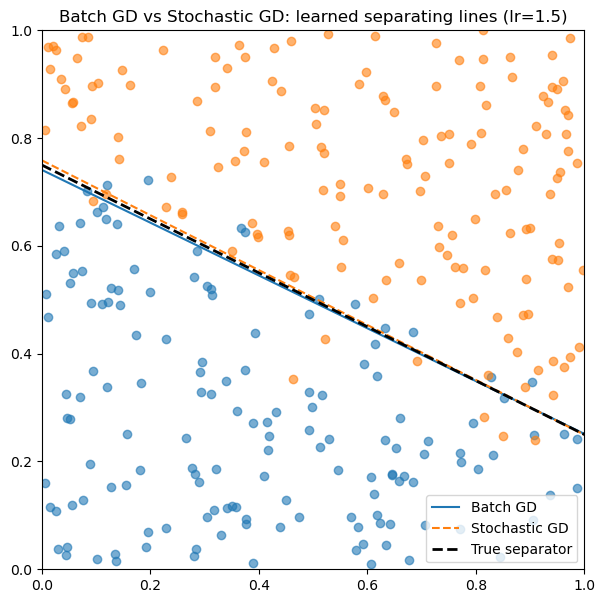

In [16]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(X[y == 0, 0], X[y == 0, 1], alpha=0.6)
ax.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.6)

plot_separator(thetas_15[-1], ax, label='Batch GD')
plot_separator(thetas_sgd[-1], ax, label='Stochastic GD', linestyle='--')

# True separator
xs = np.array([0, 1])
ys = -0.5 * xs + 0.75
ax.plot(xs, ys, 'k--', linewidth=2, label='True separator')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.legend()
ax.set_title("Batch GD vs Stochastic GD: learned separating lines (lr=1.5)")
plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
When using the same learning rate, both batch gradient descent and stochastic gradient descent converge to nearly the same separating line, which is very close to the true separator used to generate the data. However, the convergence speed differs significantly: batch logistic regression required 432 epochs to converge, whereas stochastic logistic regression reached convergence in only 17 epochs. This highlights the much faster practical convergence of stochastic gradient descent despite its noisier optimization trajectory.
</div>

In [17]:
def minibatch_logreg(X_plus, y, lr=0.1, eps=1e-4, batch_size=10, max_epochs=2000, random_seed=42, acc_target=None):
    np.random.seed(random_seed)
    def sigmoid(z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    theta = np.zeros(X_plus.shape[1])
    thetas = [theta.copy()]
    loss_prev = np.inf
    n = len(y)
    epochs = 0

    while epochs < max_epochs:
        perm = np.random.permutation(n)
        Xp = X_plus[perm]
        yp = y[perm]

        for i in range(0, n, batch_size):
            Xb = Xp[i:i+batch_size]
            yb = yp[i:i+batch_size]

            pred = sigmoid(Xb @ theta)
            err = pred - yb
            grad = Xb.T @ err / len(yb)
            theta = theta - lr * grad
            thetas.append(theta.copy())

        epochs += 1

        pred_all = sigmoid(X_plus @ theta)
        loss = -np.mean(
            y * np.log(pred_all + 1e-12) +
            (1 - y) * np.log(1 - pred_all + 1e-12)
        )

        # stopping by loss stabilization
        if abs(loss_prev - loss) < eps:
            break
        loss_prev = loss

        # optional stopping by accuracy
        if acc_target is not None:
            acc = np.mean((pred_all >= 0.5) == y)
            if acc >= acc_target:
                break

    return np.array(thetas), epochs

In [18]:
thetas_mbsgd, epochs_mbsgd = minibatch_logreg(X_plus, y, lr=1.5)
print(f'Training of mini-batch stochastic logreg with lr=1.5 required {epochs_mbsgd} epochs')

Training of mini-batch stochastic logreg with lr=1.5 required 59 epochs


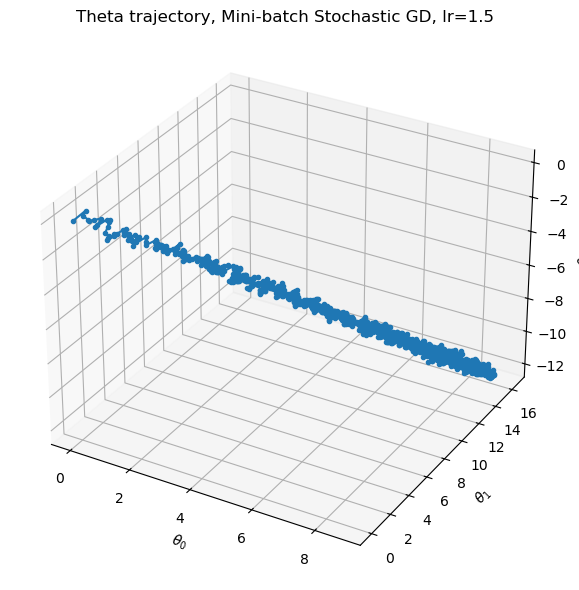

In [19]:
plot_theta_trajectory(thetas_mbsgd, title="Theta trajectory, Mini-batch Stochastic GD, lr=1.5")

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
Mini-batch gradient descent provides a compromise between batch and stochastic optimization. In this experiment, training with a mini-batch size of 10 converged in 59 epochs. The corresponding parameter trajectory is smoother than that of stochastic gradient descent while still converging significantly faster than the batch method, illustrating the trade-off between stability and convergence speed.
</div>